# MINIST Data Set

In [1]:
import numpy as np 
import matplotlib as mp

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim

from tensorflow.examples.tutorials.mnist import input_data
import math

In [3]:
# Import MINST data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
help(input_data.read_data_sets)

Help on function read_data_sets in module tensorflow.contrib.learn.python.learn.datasets.mnist:

read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000)



55000 mnist.train.images, labels

In [8]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
55000


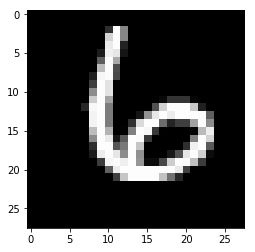

In [10]:
i = 222
arr = np.array(mnist.train.images[i])
arr.shape = (28,28)
plt.imshow(arr, cmap="gray")
print(mnist.train.labels[i])
print(mnist.train.num_examples)

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
10000


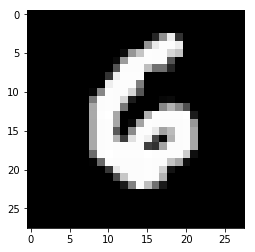

In [15]:
i = 130
img = mnist.test.images[i]
plt.imshow(np.reshape(img, [28,28]), cmap="gray")
print(mnist.test.labels[i])
print(mnist.test.num_examples)

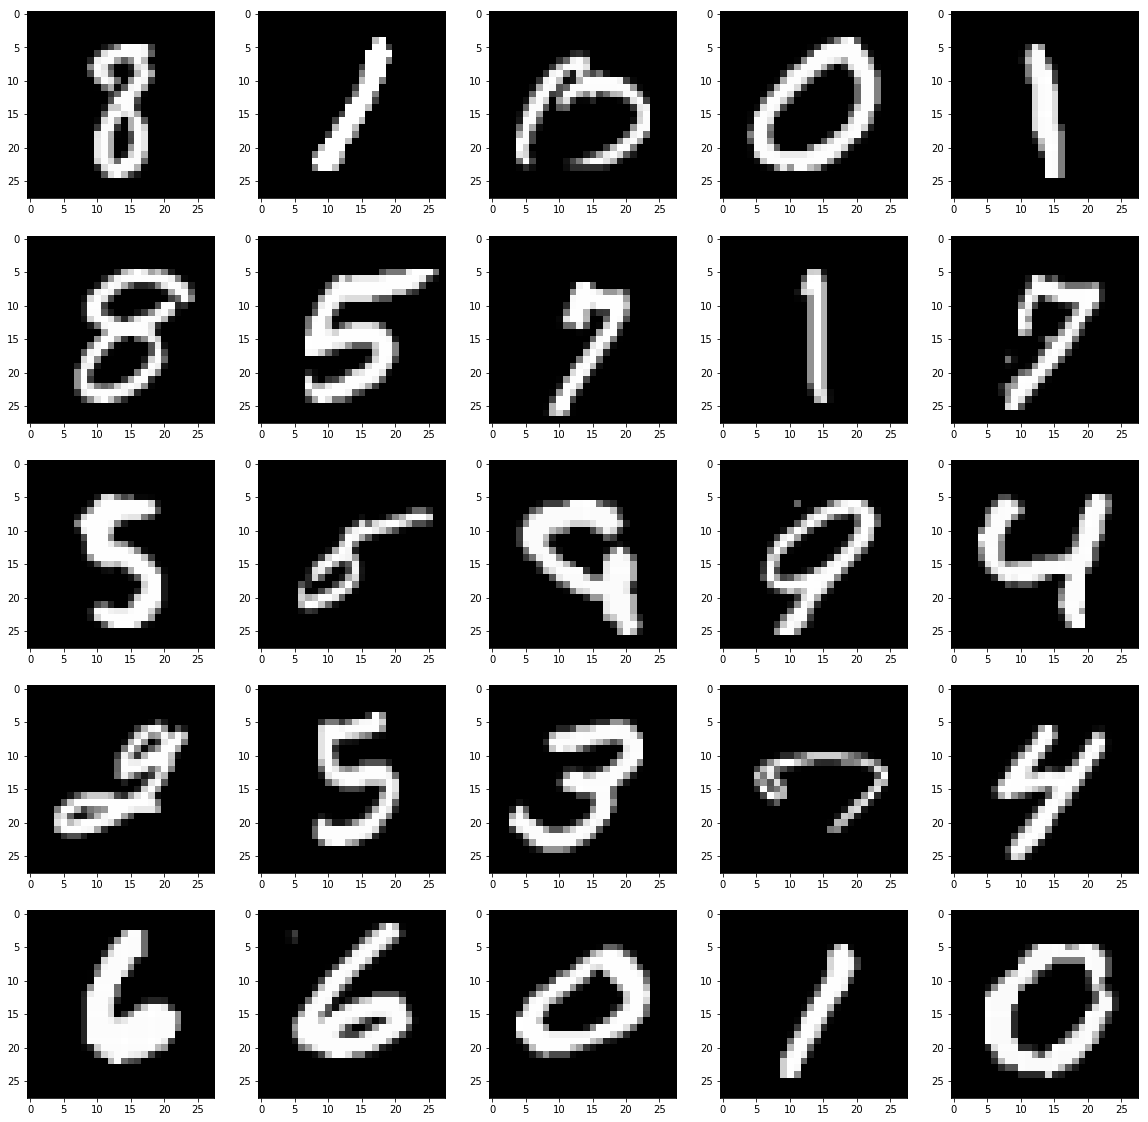

In [16]:
n_rows=5
n_columns=5
batch_xs, batch_ys = mnist.train.next_batch(n_rows*n_columns)
plt.figure(1, figsize=(20,20))
for i in range(n_rows*n_columns):
    plt.subplot(n_rows, n_columns, i+1)
    plt.imshow(np.reshape(batch_xs[i], [28,28]), interpolation="nearest", cmap="gray")

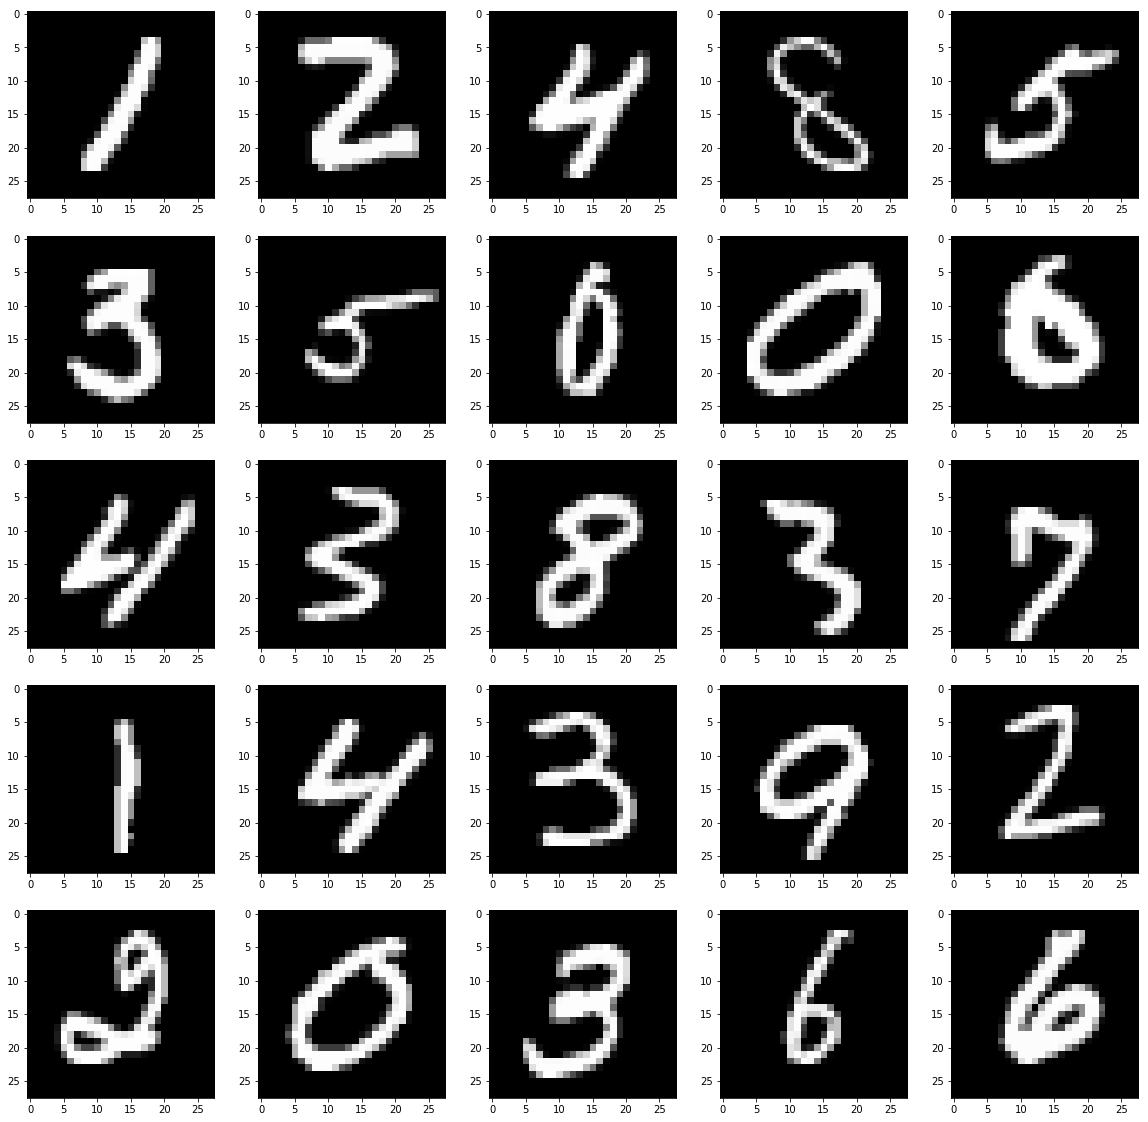

In [17]:
batch_xs, batch_ys = mnist.train.next_batch(n_rows*n_columns)
plt.figure(1, figsize=(20,20))
for i in range(n_rows*n_columns):
    plt.subplot(n_rows, n_columns, i+1)
    plt.imshow(np.reshape(batch_xs[i], [28,28]), cmap="gray")

In [19]:
# Parameters
learning_rate = 0.01
training_epochs = 3 #25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Plot settings
avg_set = []
epoch_set=[]

Epoch: 0001 cost= 1.176638824
Epoch: 0002 cost= 0.662823502
Epoch: 0003 cost= 0.550439803
Training phase finished


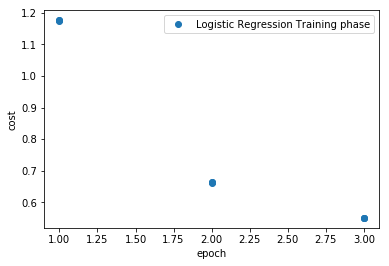

Model accuracy: 0.8821


In [24]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs): #25
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size) #55000/100
        # Loop over all batches
        for i in range(total_batch): #55000/100
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
        
    print("Training phase finished")
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    _W=sess.run(W)
    _b=sess.run(b)

In [25]:
print(_W[0:-1,0])
print(_b)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -2.38968391e-06  -1.17366772e-05  -7.23781159e-06  -3.01575454e-07
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -1.94967015e-07  -8.95093308e-07  -1.97554891e-05  -4.64637305e-05
  -8.60403015e-05  -1.24757149e-04  -2.21638882e-04  -1.24720173e-04
  -3.39235498e-06  -1.44595979e-04  -3.44992266e-04  -2.03880481e-04
  -7.22728000e-05  -1.46585342e-04  -1.75800000e-04  -1.29631779e-04
  -8.22988004e-05  -4.33151545e-05  -1.71109641e-05  -5.53863174e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [44]:
#print(W)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
10000
[ 0.38278231 -0.30585274  1.37698853  3.15606403 -3.6363306   0.66379118
  0.42951694  0.13371441 -1.27128053 -0.92939031]


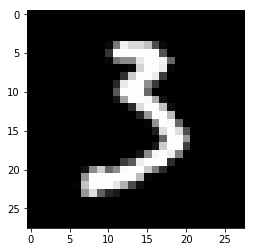

In [47]:
i = 230
img = mnist.test.images[i]
plt.imshow(np.reshape(img, [28,28]), cmap="gray")
print(mnist.test.labels[i])
print(mnist.test.num_examples)
o=np.dot(img, _W)+_b
print(o)

In [ ]:
# Parameters
learning_rate = 0.001
training_epochs = 3 #20
batch_size = 100
display_step = 1

In [49]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

#weights layer 1
h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
#bias layer 1
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))
#layer 1
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h),bias_layer_1))

#weights layer 2
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
#bias layer 2
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))
#layer 2
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w),bias_layer_2))

#weights output layer
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
#biar output layer
bias_output = tf.Variable(tf.random_normal([n_classes]))
#output layer
output_layer = tf.matmul(layer_2, output) + bias_output

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output_layer, y))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 0.467662200
Epoch: 0002 cost= 0.175848738
Epoch: 0003 cost= 0.121091739
Training phase finished


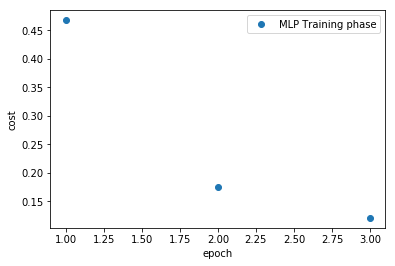

Model Accuracy: 0.0791


In [53]:
#Plot settings
avg_set = []
epoch_set=[]
    
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished")

    plt.plot(epoch_set,avg_set, 'o', label='MLP Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
        
    # Test model
    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    _h=sess.run(h)
    _b1=sess.run(bias_layer_1)
    _w=sess.run(w)
    _b2=sess.run(bias_layer_2)
    _o=sess.run(output)
    _bo=sess.run(bias_output)

In [55]:
print(_h.shape, _b1.shape, _w.shape, _b2.shape, _o.shape, _bo.shape)

(784, 256) (256,) (256, 256) (256,) (256, 10) (10,)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
10000
[  705.25622559   702.69793701  3323.40844727  2855.76757812   477.95736694
  -631.73687744  2212.0534668  -2210.02563477  -534.48083496  1146.99133301]


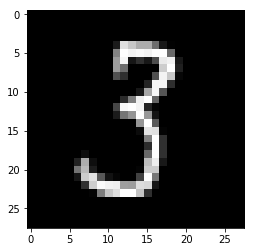

In [58]:
i = 231
img = mnist.test.images[i]
plt.imshow(np.reshape(img, [28,28]), cmap="gray")
print(mnist.test.labels[i])
print(mnist.test.num_examples)
ly1=np.dot(img, _h)+_b1
ly2=np.dot(ly1,_w)+_b2
o=np.dot(ly2,_o)+_bo;
print(o)

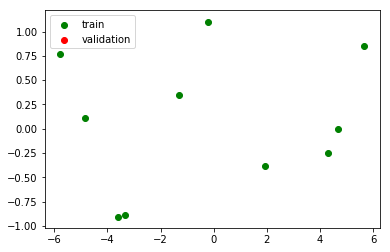

In [61]:
np.random.seed(1000) 
function_to_learn = lambda x: np.cos(x) + 0.1*np.random.randn(*x.shape)
layer_1_neurons = 10
NUM_points = 1000
#TRAIN_SPLIT = .8
batch_size = 100
NUM_EPOCHS = 150 #1500

all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_points))).T
np.random.shuffle(all_x)

train_size = int(900)
#the first 700 points are in the training set 
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

#the last 300 are in the validation set
x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

plt.figure(1)
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_validation, y_validation, c='red', label='validation')
plt.legend()
plt.show()

In [62]:
X = tf.placeholder(tf.float32, [None, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

#first layer
#Number of neurons = 10
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons],minval=-1, maxval=1, dtype=tf.float32))
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype=tf.float32))
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

#output layer
#Number of neurons = 10
w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1],minval=-1, maxval=1, dtype=tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype=tf.float32))

#build the model
model = tf.matmul(h, w_o) + b_o

#minimize the cost function (model - Y)
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0, cost = 0
epoch 100, cost = 0
epoch 200, cost = 0
epoch 300, cost = 0
epoch 400, cost = 0
epoch 500, cost = 0
epoch 600, cost = 0
epoch 700, cost = 0
epoch 800, cost = 0
epoch 900, cost = 0
epoch 1000, cost = 0
epoch 1100, cost = 0
epoch 1200, cost = 0
epoch 1300, cost = 0
epoch 1400, cost = 0


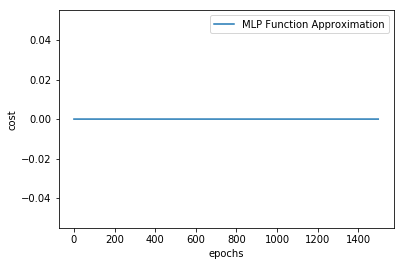

In [64]:
#Start the Learning phase
sess = tf.Session()
sess.run(tf.global_variables_initializer())

errors = []
for i in range(NUM_EPOCHS):
    for start, end in zip(range(0, len(x_training), batch_size), range(batch_size, len(x_training), batch_size)):
        sess.run(train_op, feed_dict={X: x_training[start:end], Y: y_training[start:end]})
    cost = sess.run(tf.nn.l2_loss(model - y_validation), feed_dict={X:x_validation})
    errors.append(cost)
    if i%100 == 0: print("epoch %d, cost = %g" % (i, cost))

plt.plot(errors,label='MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()